In [67]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [68]:
plt.rc ('font', size = 10) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 10) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 10) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 10) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 10) #Schriftgröße der Legende

In [69]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

FitFunktionen

In [70]:
def gaus1fit(von,bis,path,m=1,mmin=0,mmax=2,s=0.2,smax=1000,scale=1e-9,override=False): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus = lmfit.models.GaussianModel()  
    pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["sigma"].set(value=1,min=0)
        pars_gaus["amplitude"].set(value=1,min=0)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])




def gaus2fit(von,bis,path,override=False,m1=1,s1=1,scale1=1,m2=1,s2=1,scale2=1,m1min=1,m1max=1,m2min=1,m2max=1): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus=lmfit.models.GaussianModel(prefix="g1_")+lmfit.models.GaussianModel(prefix="g2_")

    def guess(data,x):
        params_g1=lmfit.models.GaussianModel(prefix="g1_").guess(data,x)
        params=model_gaus.make_params()
        for i in params_g1:
            params[i]=params_g1[i]
                    
        params["g2_center"].value=params.get("g1_center").value-1
        params["g2_sigma"].value=params.get("g1_sigma").value*0.5
        params["g2_amplitude"].value=params.get("g1_amplitude").value*0.3
        return params

    model_gaus.guess=guess
    pars_gaus = model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["g1_center"].set(value=m1,min=m1min,max=m1max)
        pars_gaus["g1_sigma"].set(value=s1)
        pars_gaus["g1_amplitude"].set(value=scale1)
        pars_gaus["g2_center"].set(value=m2,min=m2min,max=m2max)
        pars_gaus["g2_sigma"].set(value=s2)
        pars_gaus["g2_amplitude"].set(value=scale2)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())

    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])

Daten einlesen und Standartfehler as Fehler der Counts festlegen

In [1]:
with open('Data/uluft_1.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T

with open('Data/restgas_3.csv', mode='r') as tf:
        datarestex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T




#hier schon fehlerfortpflany´zung

data = np.zeros((2,len(dataex[3])))

data[0] = dataex[3]
data[1] = dataex[4]
datarest = datarestex[4]
err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])





v = pos(10)
b = pos(60)

fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0,v:b],data[1,v:b],label = 'Data')
#plt.vlines(18.6,0,10e-9)

NameError: name 'np' is not defined

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 55
    # variables        = 3
    chi-square         = 2.7499e-16
    reduced chi-square = 5.2882e-18
    Akaike info crit   = -2185.04284
    Bayesian info crit = -2179.02084
[[Variables]]
    amplitude:  1.3373e-08 +/- 4.4905e-10 (3.36%) (init = 1.603948e-08)
    center:     14.1838104 +/- 0.01027705 (0.07%) (init = 14.19)
    sigma:      0.27655018 +/- 0.01149664 (4.16%) (init = 0.29)
    fwhm:       0.65122590 +/- 0.02707251 (4.16%) == '2.3548200*sigma'
    height:     1.9292e-08 +/- 5.8910e-10 (3.05%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.689
    C(center, sigma)     = 0.215
    C(amplitude, center) = 0.183


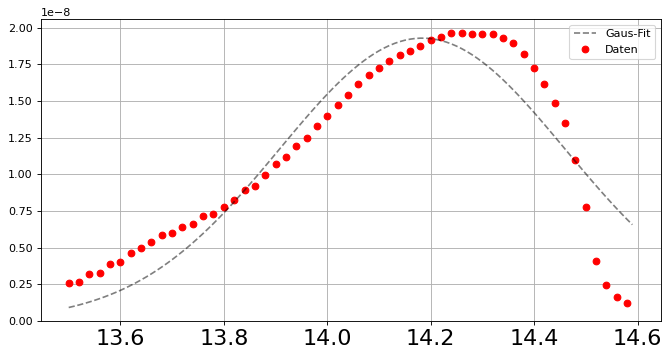

In [72]:
p14 = gaus1fit(13.5,14.6,'uluft_14.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 50
    # variables        = 3
    chi-square         = 4.4537e-17
    reduced chi-square = 9.4759e-19
    Akaike info crit   = -2072.11226
    Bayesian info crit = -2066.37619
[[Variables]]
    amplitude:  5.6539e-09 +/- 1.9150e-10 (3.39%) (init = 5.683995e-09)
    center:     16.1954519 +/- 0.01005609 (0.06%) (init = 16.21)
    sigma:      0.27141160 +/- 0.01148309 (4.23%) (init = 0.25)
    fwhm:       0.63912546 +/- 0.02704060 (4.23%) == '2.3548200*sigma'
    height:     8.3106e-09 +/- 2.5327e-10 (3.05%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.701
    C(center, sigma)     = 0.211
    C(amplitude, center) = 0.182


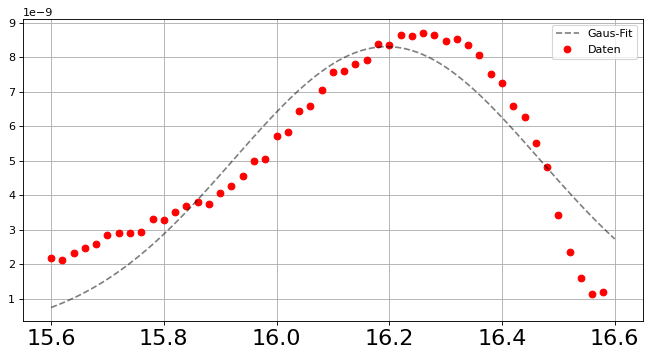

In [73]:
p16 = gaus1fit(15.6,16.6,'uluft_16.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 35
    # variables        = 3
    chi-square         = 5.8651e-18
    reduced chi-square = 1.8329e-19
    Akaike info crit   = -1507.14985
    Bayesian info crit = -1502.48380
[[Variables]]
    amplitude:  2.8357e-09 +/- 6.8112e-11 (2.40%) (init = 3.458842e-09)
    center:     17.2622933 +/- 0.00504626 (0.03%) (init = 17.28)
    sigma:      0.19257390 +/- 0.00577098 (3.00%) (init = 0.22)
    fwhm:       0.45347687 +/- 0.01358963 (3.00%) == '2.3548200*sigma'
    height:     5.8745e-09 +/- 1.3195e-10 (2.25%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.674


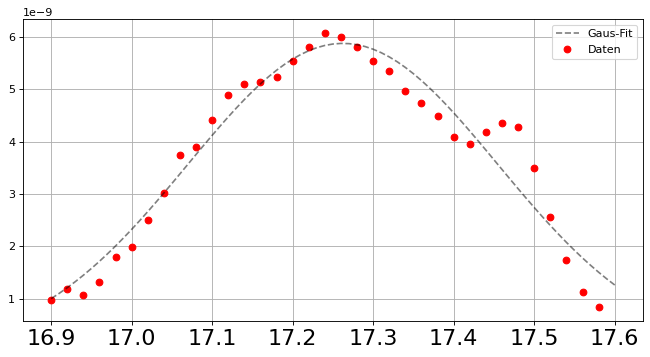

In [74]:
p17 = gaus1fit(16.9,17.6,'uluft_17.2')

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 59
    # variables        = 6
    chi-square         = 6.6827e-17
    reduced chi-square = 1.2609e-18
    Akaike info crit   = -2425.99581
    Bayesian info crit = -2413.53059
##  Warning: uncertainties could not be estimated:
[[Variables]]
    g1_amplitude:  8.1879e-09 (init = 2.533068e-08)
    g1_center:     18.2324759 (init = 18.21)
    g1_sigma:      0.18395590 (init = 0.23)
    g2_amplitude: -8.1175e-09 (init = 7.599203e-09)
    g2_center:     17.0232692 (init = 17.21)
    g2_sigma:      0.00528899 (init = 0.9)
    g1_fwhm:       0.43318303 == '2.3548200*g1_sigma'
    g1_height:     1.7757e-08 == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_fwhm:       0.01245463 == '2.3548200*g2_sigma'
    g2_height:    -6.1229e-07 == '0.3989423*g2_amplitude/max(1e-15, g2_sigma)'


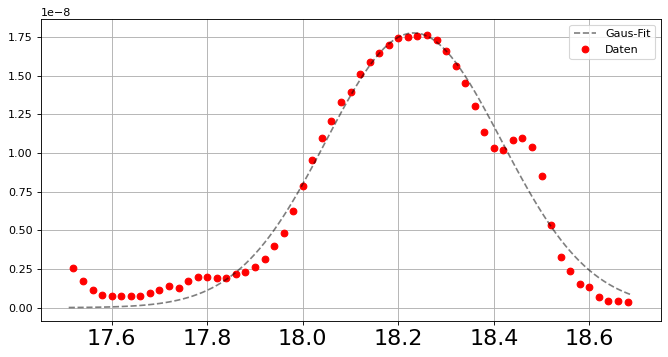

In [75]:
p18 = gaus2fit(17.51,18.7,'uluft_18.2',override=True,m1=18.21,m1min=18,m1max=18.5,s1=0.23,scale1=2.533068e-08,m2=17.21,m2min=17,m2max=17.5,s2=0.9,scale2=7.599203e-09)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 100
    # variables        = 3
    chi-square         = 2.1987e-14
    reduced chi-square = 2.2667e-16
    Akaike info crit   = -3599.35013
    Bayesian info crit = -3591.53462
[[Variables]]
    amplitude:  1.4221e-07 +/- 2.2967e-09 (1.62%) (init = 1.949083e-07)
    center:     28.1759290 +/- 0.00408084 (0.01%) (init = 28.18)
    sigma:      0.21882091 +/- 0.00408087 (1.86%) (init = 0.26)
    fwhm:       0.51528386 +/- 0.00960971 (1.86%) == '2.3548200*sigma'
    height:     2.5926e-07 +/- 4.1873e-09 (1.62%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


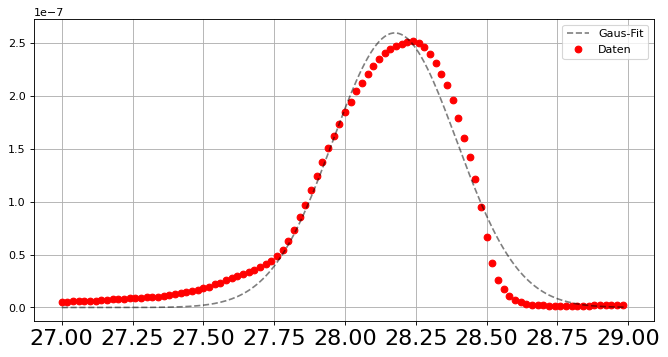

In [76]:
p28 = gaus1fit(27,29,'uluft_28.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 35
    # variables        = 3
    chi-square         = 5.1311e-19
    reduced chi-square = 1.6035e-20
    Akaike info crit   = -1592.42027
    Bayesian info crit = -1587.75422
[[Variables]]
    amplitude:  3.0676e-09 +/- 6.7629e-11 (2.20%) (init = 1.557672e-09)
    center:     29.2523775 +/- 0.00630844 (0.02%) (init = 29.25)
    sigma:      0.33804415 +/- 0.00881385 (2.61%) (init = 0.23)
    fwhm:       0.79603312 +/- 0.02075503 (2.61%) == '2.3548200*sigma'
    height:     3.6202e-09 +/- 3.3065e-11 (0.91%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.942
    C(amplitude, center) = 0.694
    C(center, sigma)     = 0.656


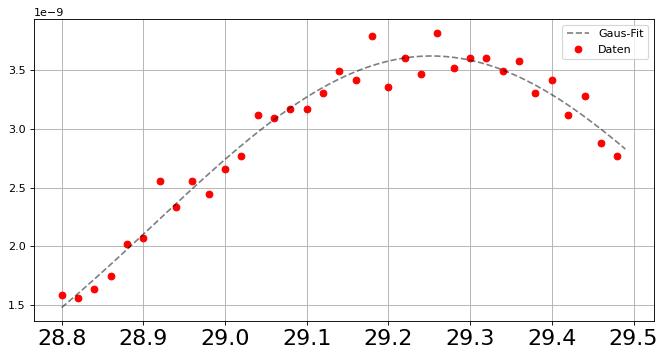

In [77]:
p29 = gaus1fit(28.8,29.5,'uluft_29.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 55
    # variables        = 3
    chi-square         = 8.1691e-17
    reduced chi-square = 1.5710e-18
    Akaike info crit   = -2251.80051
    Bayesian info crit = -2245.77851
[[Variables]]
    amplitude:  1.0629e-08 +/- 2.1369e-10 (2.01%) (init = 1.308297e-08)
    center:     30.1674428 +/- 0.00549339 (0.02%) (init = 30.17)
    sigma:      0.24268017 +/- 0.00589914 (2.43%) (init = 0.27)
    fwhm:       0.57146812 +/- 0.01389141 (2.43%) == '2.3548200*sigma'
    height:     1.7473e-08 +/- 3.3794e-10 (1.93%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.635
    C(center, sigma)    = 0.108


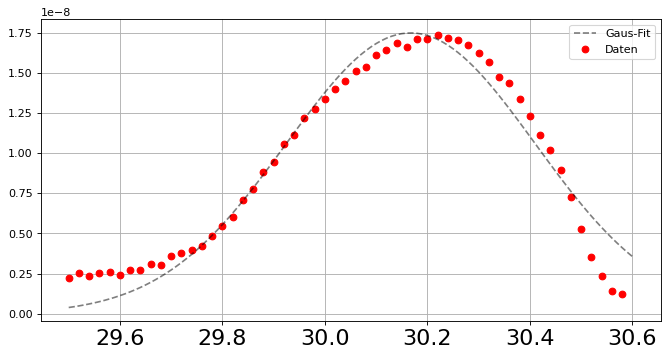

In [78]:
p30 = gaus1fit(29.5,30.6,'uluft_30.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 65
    # variables        = 3
    chi-square         = 8.3809e-16
    reduced chi-square = 1.3518e-17
    Akaike info crit   = -2521.83665
    Bayesian info crit = -2515.31348
[[Variables]]
    amplitude:  2.8524e-08 +/- 5.8288e-10 (2.04%) (init = 3.93256e-08)
    center:     32.1517303 +/- 0.00553698 (0.02%) (init = 32.16)
    sigma:      0.23508885 +/- 0.00556728 (2.37%) (init = 0.28)
    fwhm:       0.55359192 +/- 0.01310994 (2.37%) == '2.3548200*sigma'
    height:     4.8405e-08 +/- 9.8812e-10 (2.04%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.580


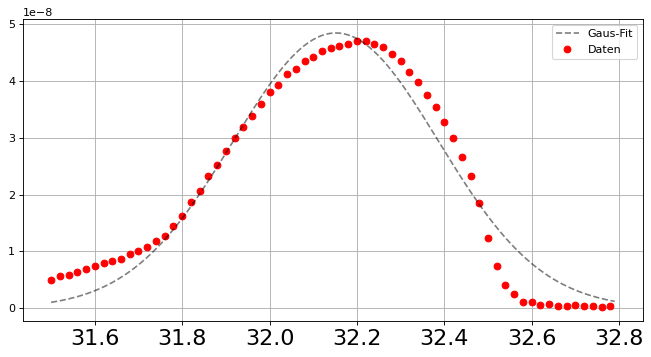

In [79]:
p32 = gaus1fit(31.5,32.8,'uluft_32.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 55
    # variables        = 3
    chi-square         = 3.9950e-18
    reduced chi-square = 7.6827e-20
    Akaike info crit   = -2417.78499
    Bayesian info crit = -2411.76299
[[Variables]]
    amplitude:  2.0024e-09 +/- 5.3230e-11 (2.66%) (init = 2.384883e-09)
    center:     40.1230560 +/- 0.00840668 (0.02%) (init = 40.15)
    sigma:      0.28609800 +/- 0.00939293 (3.28%) (init = 0.29)
    fwhm:       0.67370930 +/- 0.02211867 (3.28%) == '2.3548200*sigma'
    height:     2.7922e-09 +/- 6.9656e-11 (2.49%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.666
    C(center, sigma)     = 0.126
    C(amplitude, center) = 0.103


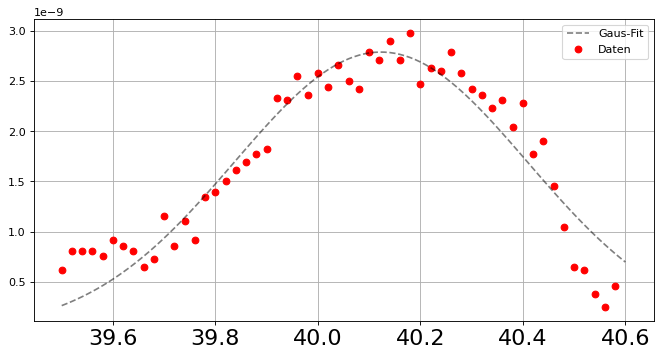

In [80]:
p40 = gaus1fit(39.5,40.6,'uluft_40.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 100
    # variables        = 3
    chi-square         = 8.2045e-18
    reduced chi-square = 8.4582e-20
    Akaike info crit   = -4388.70193
    Bayesian info crit = -4380.88641
[[Variables]]
    amplitude:  1.5702e-09 +/- 5.8250e-11 (3.71%) (init = 2.641264e-09)
    center:     44.1464353 +/- 0.01574482 (0.04%) (init = 44.13676)
    sigma:      0.36972628 +/- 0.01602258 (4.33%) (init = 0.42)
    fwhm:       0.87063885 +/- 0.03773029 (4.33%) == '2.3548200*sigma'
    height:     1.6943e-09 +/- 6.2544e-11 (3.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.588


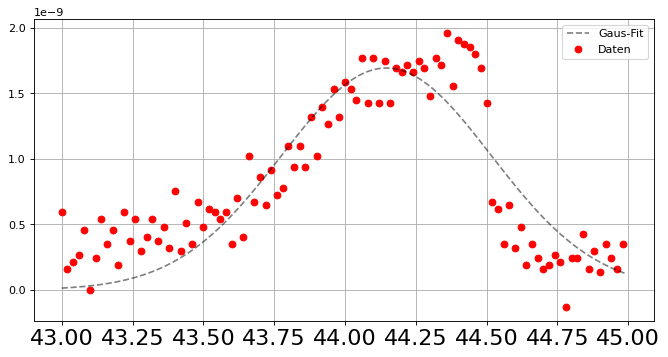

In [81]:
p44 = gaus1fit(43,45,'uluft_44.2')

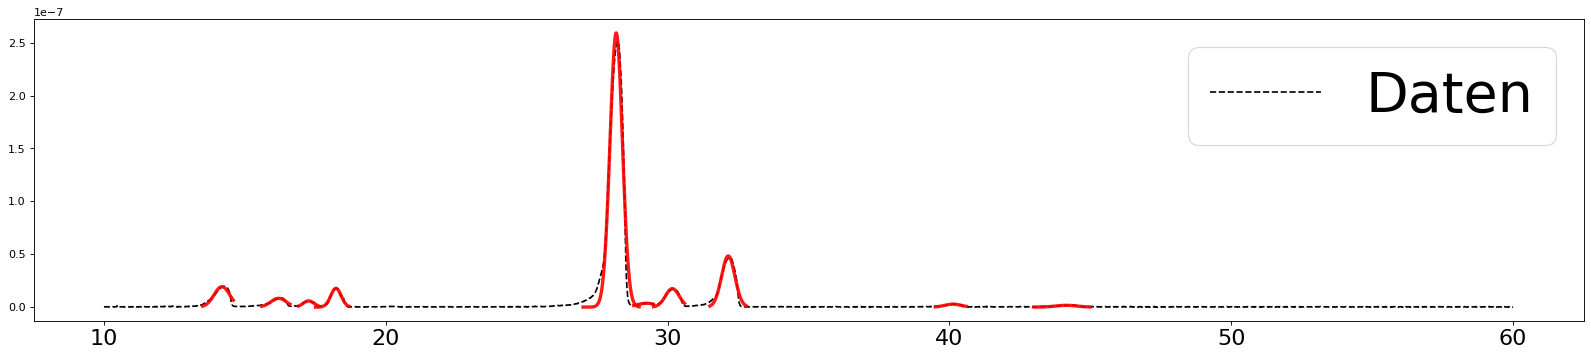

In [82]:
fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],zorder=5,mfc='black',color='k',linestyle='--',label='Daten')

plt.plot(p14[0],p14[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p16[0],p16[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p17[0],p17[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p18[0],p18[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p28[0],p28[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p29[0],p29[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p30[0],p30[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p32[0],p32[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p40[0],p40[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p44[0],p44[1],zorder=10,color='r',alpha=0.9,linewidth=3)


plt.legend(fontsize=50)